In [1]:
import urllib.request
import pandas as pd

In [2]:
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
gff_file = "E_coli.gff.gz"

In [3]:
urllib.request.urlretrieve(source_url, gff_file)

('E_coli.gff.gz', <email.message.Message at 0x2601c4605c8>)

In [4]:
gff_data = pd.read_csv(gff_file, sep="\t", comment="#", names=["seqid",
                                                              "source",
                                                              "type",
                                                              "start",
                                                              "end",
                                                              "score",
                                                              "strand",
                                                              "phase",
                                                              "attributes"])

In [5]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [6]:
gff_data.shape

(10121, 9)

In [7]:
gff_data["type"]

0        region
1          gene
2           CDS
3          gene
4           CDS
          ...  
10116       CDS
10117      gene
10118       CDS
10119      gene
10120       CDS
Name: type, Length: 10121, dtype: object

In [8]:
gff_data["type"].unique()

array(['region', 'gene', 'CDS', 'repeat_region', 'mobile_genetic_element',
       'ncRNA', 'exon', 'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'recombination_feature', 'origin_of_replication'], dtype=object)

In [9]:
gff_data["type"].value_counts()

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
region                       1
origin_of_replication        1
recombination_feature        1
Name: type, dtype: int64

In [10]:
gff_genes = gff_data[gff_data["type"] == "gene"]

In [11]:
gff_genes

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [12]:
gff_plus_strand = gff_data[gff_data["strand"] == "+"]

In [13]:
gff_plus_strand

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10114,NC_000913.3,RefSeq,CDS,4638178,4639530,.,+,0,ID=cds-NP_418817.1;Parent=gene-b4400;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [14]:
gff_genes[gff_genes["strand"] == "+"]

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10109,NC_000913.3,RefSeq,gene,4636007,4636696,.,+,.,"ID=gene-b4398;Dbxref=ASAP:ABE-0014428,ECOCYC:E..."
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [15]:
gff_data.loc[1:4, ["type", "strand"]]

,type,strand
1,gene,+
2,CDS,+
3,gene,+
4,CDS,+


In [16]:
gff_data["length"] = gff_data["end"] = gff_data["start"] + 1

In [17]:
gff_data["length"]

0              2
1            191
2            191
3            338
4            338
          ...   
10116    4639591
10117    4640403
10118    4640403
10119    4640943
10120    4640943
Name: length, Length: 10121, dtype: int64

In [18]:
gff_data.head(15)

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,NC_000913.3,RefSeq,region,1,2,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...,2
1,NC_000913.3,RefSeq,gene,190,191,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",191
2,NC_000913.3,RefSeq,CDS,190,191,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,191
3,NC_000913.3,RefSeq,gene,337,338,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",338
4,NC_000913.3,RefSeq,CDS,337,338,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,338
5,NC_000913.3,RefSeq,gene,2801,2802,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",2802
6,NC_000913.3,RefSeq,CDS,2801,2802,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,2802
7,NC_000913.3,RefSeq,gene,3734,3735,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",3735
8,NC_000913.3,RefSeq,CDS,3734,3735,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,3735
9,NC_000913.3,RefSeq,gene,5234,5235,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",5235


In [19]:
gff_genes = gff_data[gff_data["type"] == "gene"]

In [22]:
 gff_genes

,seqid,source,type,start,end,score,strand,phase,attributes,length
1,NC_000913.3,RefSeq,gene,190,191,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",191
3,NC_000913.3,RefSeq,gene,337,338,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",338
5,NC_000913.3,RefSeq,gene,2801,2802,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",2802
7,NC_000913.3,RefSeq,gene,3734,3735,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",3735
9,NC_000913.3,RefSeq,gene,5234,5235,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",5235
...,...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4636697,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E...",4636697
10113,NC_000913.3,RefSeq,gene,4638178,4638179,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E...",4638179
10115,NC_000913.3,RefSeq,gene,4639590,4639591,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E...",4639591
10117,NC_000913.3,RefSeq,gene,4640402,4640403,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G...",4640403


In [23]:
gff_genes["length"] = gff_genes["end"] = gff_genes["start"] + 1

C:\Users\tomos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\tomos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


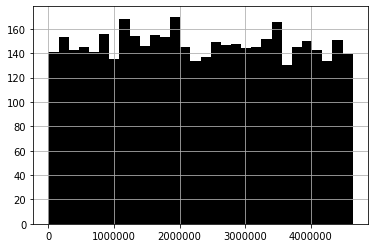

In [24]:
%matplotlib inline
gff_genes["length"].hist(bins=30, color="black")